In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, auc
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier

In [39]:
train = pd.read_csv("02_prepare_data/output/train.csv")
test =  pd.read_csv("02_prepare_data/output/test.csv")

train_x = train.drop(['Exited','id' ], axis = 1)
train_y = train['Exited']

test_x = test


In [14]:
param_grid = {'max_features': ['sqrt', 'log2'],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy'],
              'min_samples_leaf': [10,20,30,50],
              'ccp_alpha': [0.001, 0.01, 0.1]
             }

tree = DecisionTreeClassifier(random_state=0)


In [15]:
tree_grid = GridSearchCV(estimator = tree, param_grid = param_grid, cv = 5,scoring = 'roc_auc', 
                         verbose = 0, return_train_score = True)

tree_grid.fit(train_x, train_y)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [10, 20, 30, 50]},
             return_train_score=True, scoring='roc_auc')

In [16]:
results = pd.DataFrame(tree_grid.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)

In [17]:
results.iloc[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
72,0.195699,0.006765,0.012699,0.001319,0.001,entropy,9,sqrt,10,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",...,0.850118,0.007780,1,0.843215,0.840014,0.852631,0.856235,0.859713,0.850362,0.007553
76,0.159683,0.003521,0.011252,0.000894,0.001,entropy,9,log2,10,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",...,0.850118,0.007780,1,0.843215,0.840014,0.852631,0.856235,0.859713,0.850362,0.007553
71,0.178651,0.018158,0.012615,0.001901,0.001,entropy,8,log2,50,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",...,0.849429,0.007641,3,0.855933,0.845635,0.849636,0.841826,0.858113,0.850228,0.006111


In [18]:
print(tree_grid.best_params_)


{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 10}


[Text(0.6049107142857143, 0.9375, 'NumOfProducts <= 1.5\nentropy = 0.745\nsamples = 165034\nvalue = [130113, 34921]'),
 Text(0.40029761904761907, 0.8125, 'Geography_France <= 0.5\nentropy = 0.931\nsamples = 77374\nvalue = [50516, 26858]'),
 Text(0.28869047619047616, 0.6875, 'Balance <= 141828.562\nentropy = 0.975\nsamples = 36527\nvalue = [21623, 14904]'),
 Text(0.22023809523809523, 0.5625, 'IsActiveMember <= 0.5\nentropy = 0.98\nsamples = 31359\nvalue = [18277, 13082]'),
 Text(0.15476190476190477, 0.4375, 'Balance <= 102287.918\nentropy = 0.996\nsamples = 17200\nvalue = [7967, 9233]'),
 Text(0.09523809523809523, 0.3125, 'Balance <= 58520.275\nentropy = 1.0\nsamples = 6709\nvalue = [3362, 3347]'),
 Text(0.047619047619047616, 0.1875, 'Age <= 41.5\nentropy = 0.995\nsamples = 3898\nvalue = [1779, 2119]'),
 Text(0.023809523809523808, 0.0625, 'entropy = 0.943\nsamples = 2297\nvalue = [1470, 827]'),
 Text(0.07142857142857142, 0.0625, 'entropy = 0.708\nsamples = 1601\nvalue = [309, 1292]'),
 

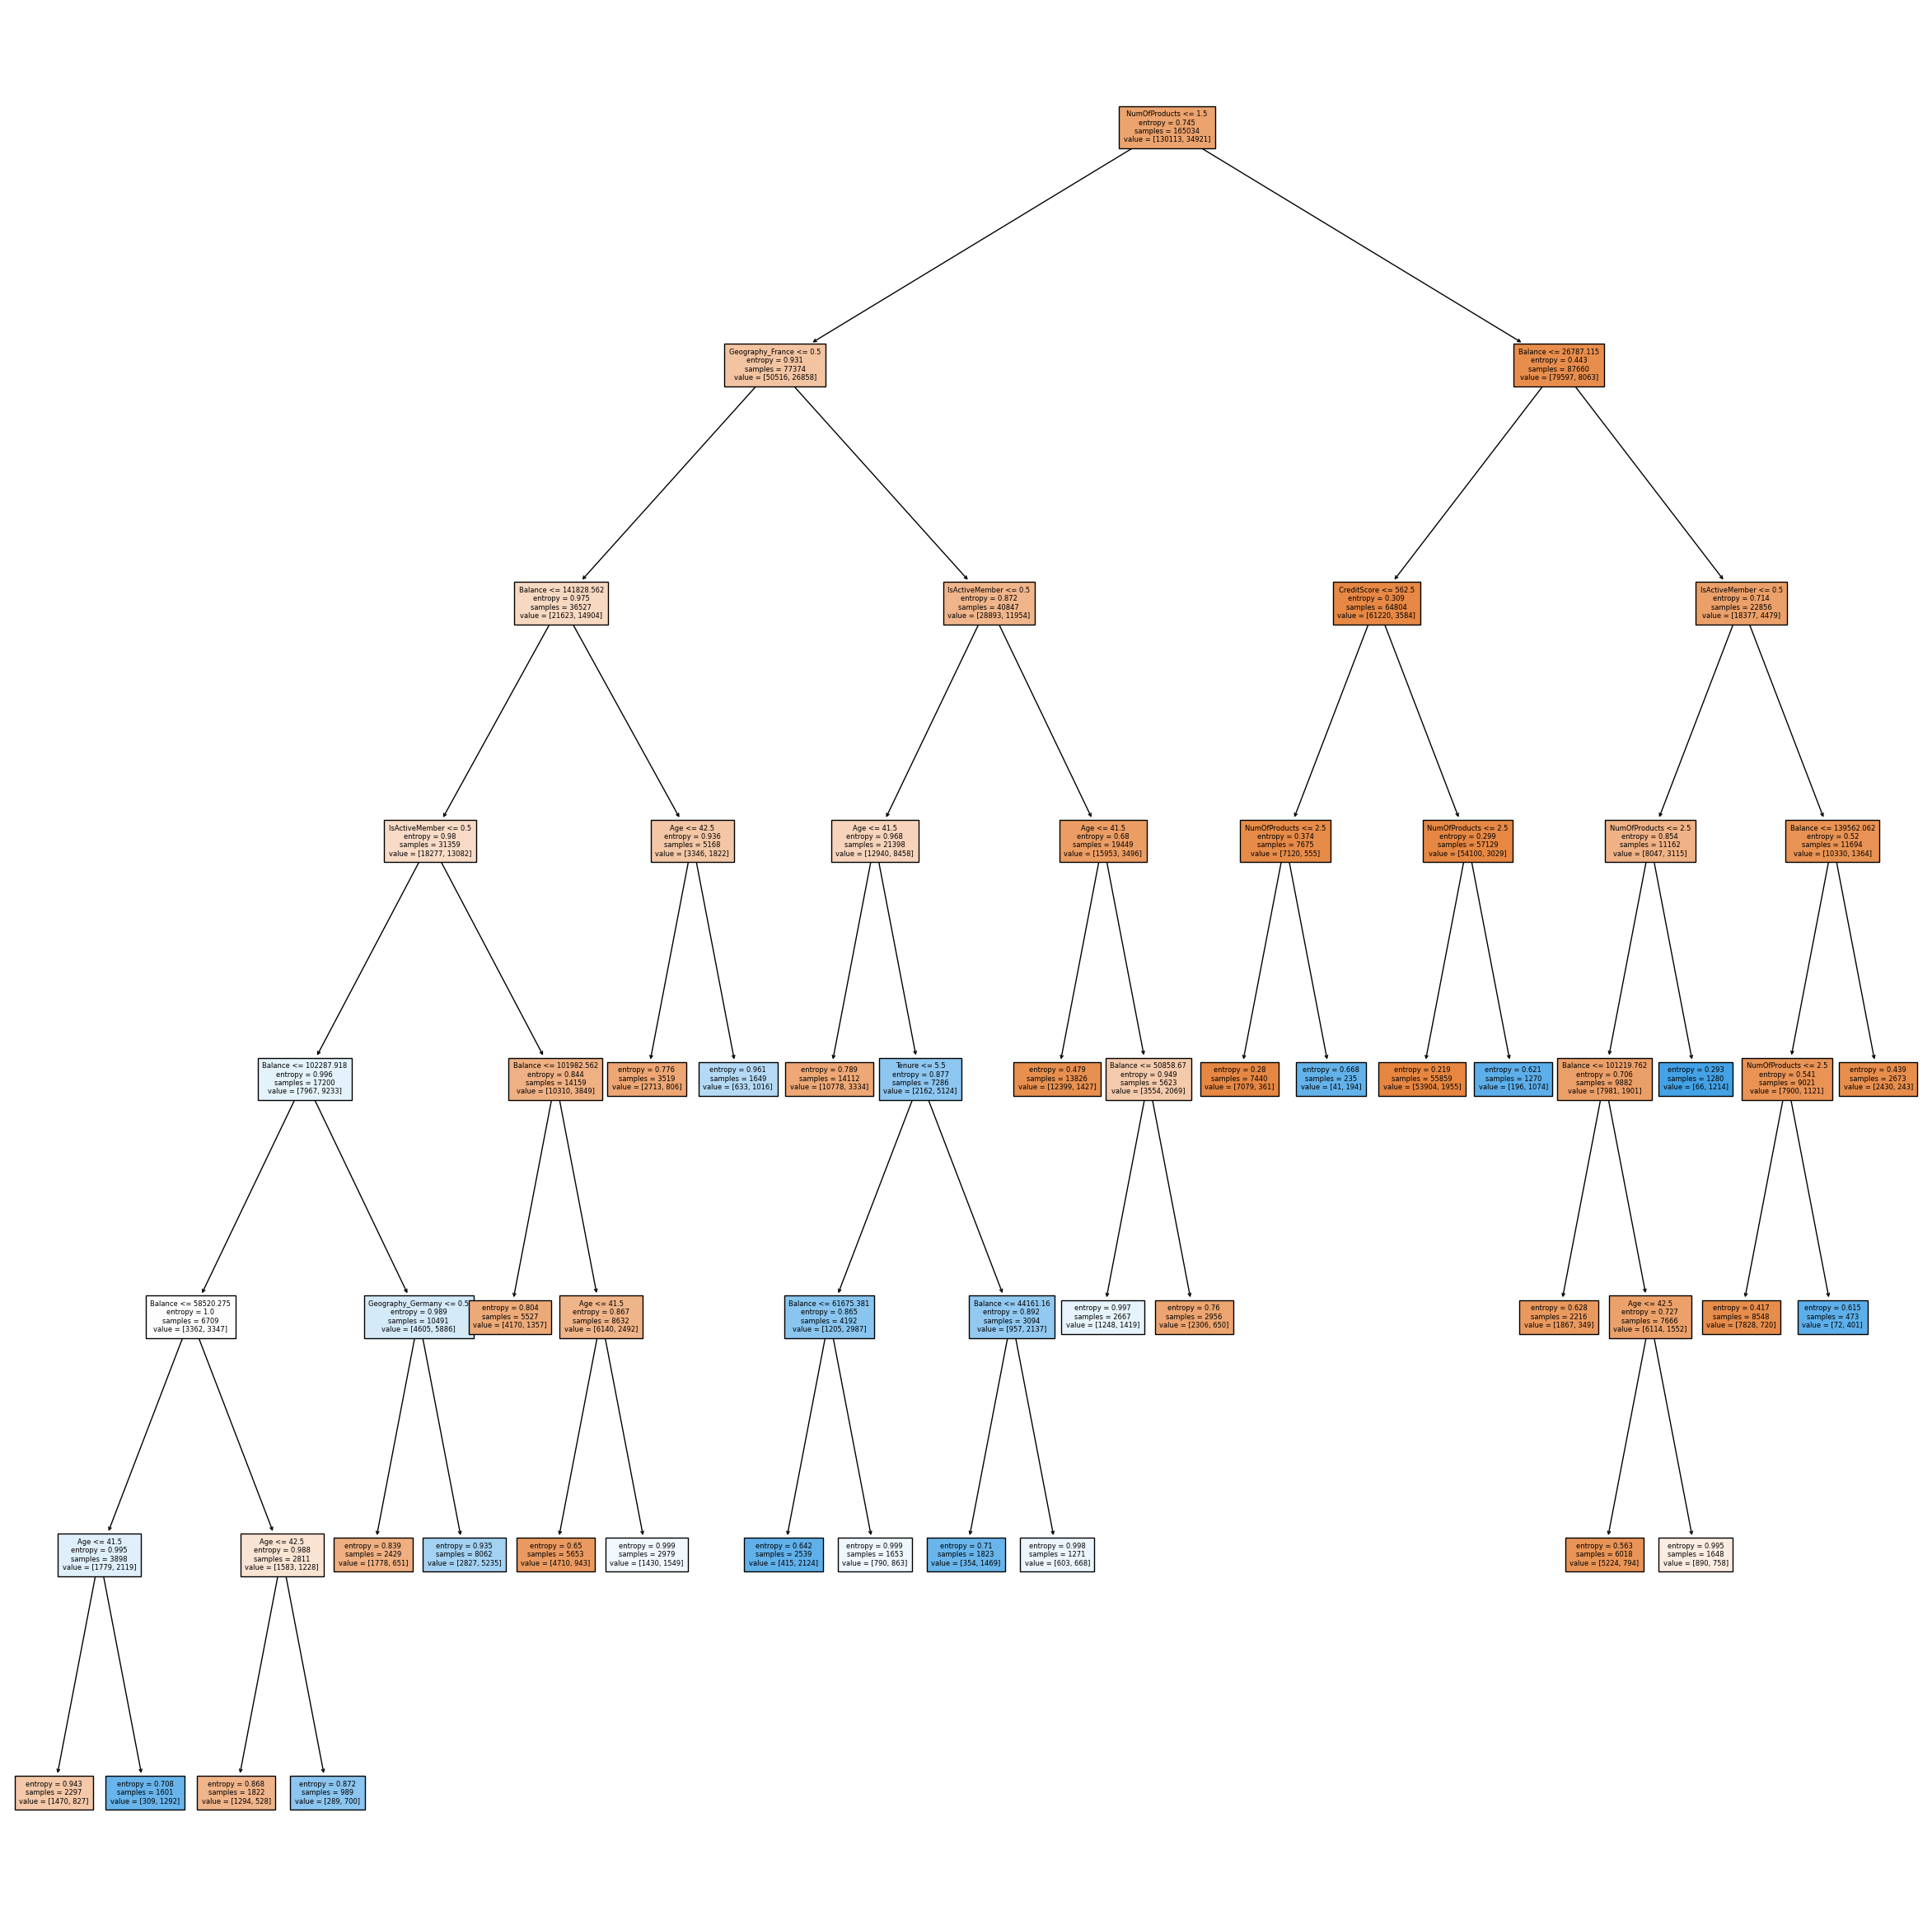

In [49]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 30))

plot_tree(tree_grid.best_estimator_, 
          fontsize=6,
          feature_names= test_x.columns,
          filled=True)

In [40]:
id = test_x['id']
test_x = test_x.drop(['id'], axis=1)

prediction = tree_grid.predict(test_x)
prediction_proba = tree_grid.predict_proba(test_x)
submission = pd.DataFrame({'id':id,'Exited':prediction_proba[:,1]})

In [47]:
submission.to_csv("04_submissions/output/tree_1.csv", index=False)